In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


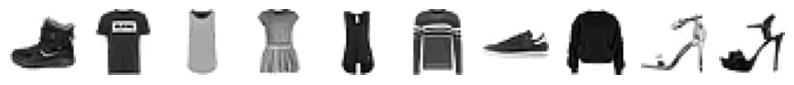

In [3]:
#시각화
import matplotlib.pyplot as plt

# 처음 10개 이미지를 표시
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [4]:
# 데이터 스케일링 및 차원 변환
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

# 훈련 데이터를 훈련 세트와 검증 세트로 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [5]:
model = keras.Sequential()

# 합성곱 레이어 및 풀링 레이어 추가
# kernel_size=3와 kernel_size=(3,3)은 동일한 의미입니다.
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 완전 연결 레이어 추가
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2)

# 모델 훈련
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 18s 4ms/step - loss: 0.5216 - accuracy: 0.8121 - val_loss: 0.3281 - val_accuracy: 0.8792
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3453 - accuracy: 0.8754 - val_loss: 0.2825 - val_accuracy: 0.8939
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2924 - accuracy: 0.8939 - val_loss: 0.2581 - val_accuracy: 0.9037
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2639 - accuracy: 0.9038 - val_loss: 0.2417 - val_accuracy: 0.9113
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2363 - accuracy: 0.9132 - val_loss: 0.2244 - val_accuracy: 0.9146
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2189 - accuracy: 0.9193 - val_loss: 0.2231 - val_accuracy: 0.9181
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2006 - accuracy: 0.9255 - val_loss: 0.2169 - val_accuracy

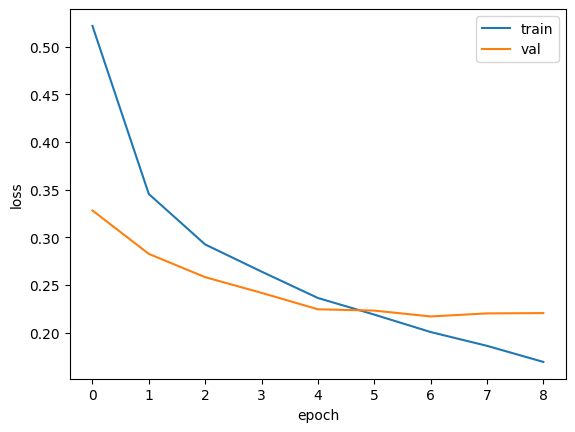

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

1/1 [==============================] - 0s 143ms/step


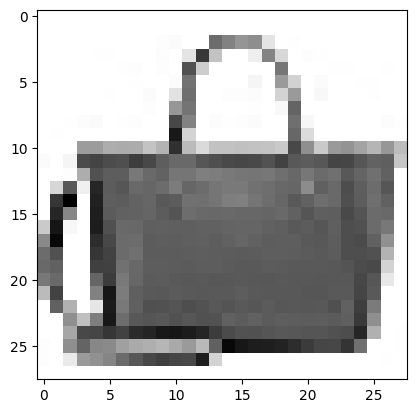

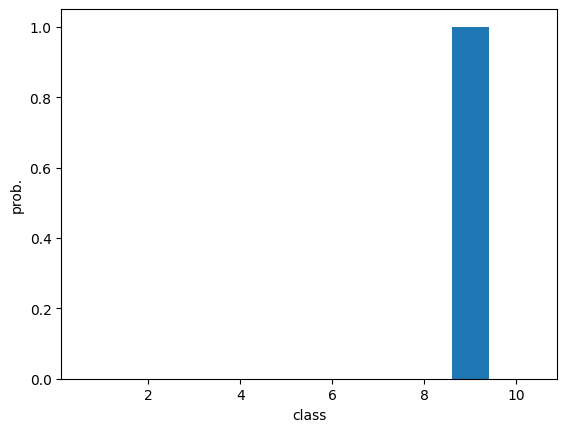

가방
313/313 [==============================] - 1s 3ms/step - loss: 0.2439 - accuracy: 0.9163


[0.24388019740581512, 0.9162999987602234]

In [8]:
import numpy as np

# 모델 평가
model.evaluate(val_scaled, val_target)

# 예측
predicted = model.predict(val_scaled[0:1])
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()
plt.bar(range(1, 11), predicted[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
print(classes[np.argmax(predicted)])

# 테스트 세트 평가
model.evaluate(test_scaled, test_target)